Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

%matplotlib inline


Bad key "axes.prop_cycle" on line 11 in
/Users/yyanxu/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/seaborn.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution


In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
colors = "bry"

## Shuffle Data

In [4]:
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

In [5]:
# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [24]:
clf = SGDClassifier(alpha=0.001, n_iter=10)
clf.fit(X, y)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

# Plot

In [9]:
h = .02 

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

(-2.8700241338470187,
 3.4899758661529869,
 -3.4389872524918395,
 4.1010127475081664)

/Users/yyanxu/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


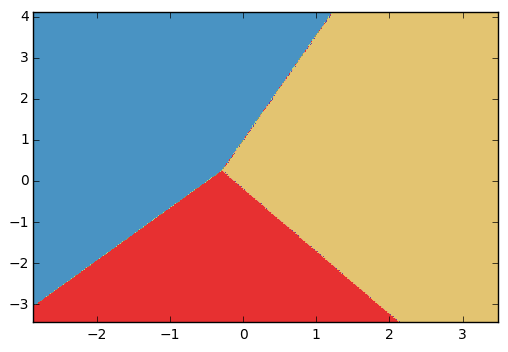

In [10]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

(-3.1880241338470192,
 3.8079758661529874,
 -3.8159872524918397,
 4.478012747508167)

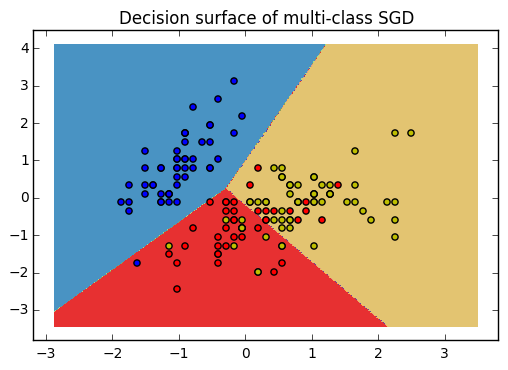

In [12]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

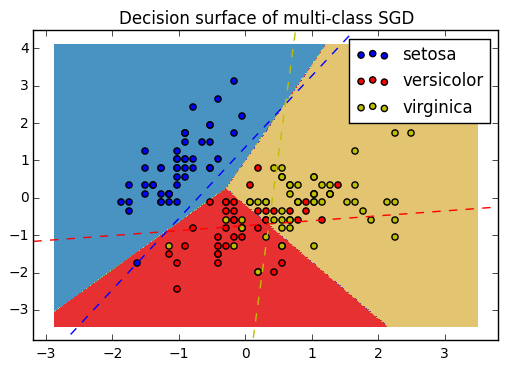

In [15]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()


In [19]:
clf.coef_

array([[-4.04908754,  2.12392426],
       [ 0.15275559, -1.16000113],
       [ 1.71517379, -0.13264997]])